In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:

# Load data from CSV file
file_path = 'C:\\Users\\Jayashrinidhi V\\OneDrive\\Documents\\VScode\\ML\\data.csv'

try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='latin1')


In [19]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

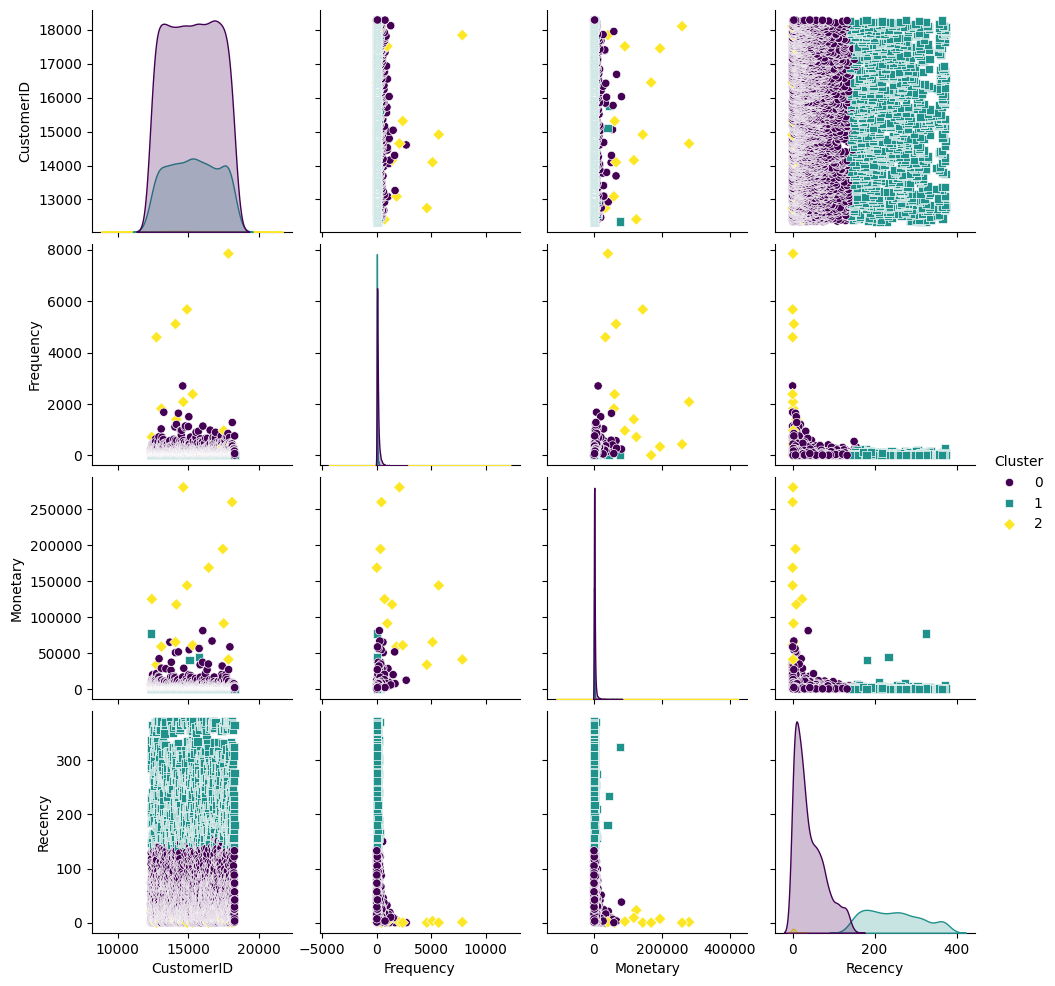

Cluster Centers:
[[ 4.97409397e-02 -2.79748018e-03 -5.11752754e-01]
 [-2.79369542e-01 -1.57595540e-01  1.54676592e+00]
 [ 1.08145481e+01  1.38029694e+01 -8.78174545e-01]]
Clustered Data:
   CustomerID  Frequency  Monetary  Recency  Cluster
0     12346.0          1  77183.60      325        1
1     12347.0        182   4310.00        1        0
2     12348.0         31   1797.24       74        0
3     12349.0         73   1757.55       18        0
4     12350.0         17    334.40      309        1


In [20]:

# Preprocess data: Remove rows with missing CustomerID and negative quantities
data = data.dropna(subset=['CustomerID'])
data = data[data['Quantity'] > 0]

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Feature Engineering
# Calculate total spending per invoice
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

# Aggregate data by CustomerID
customer_data = data.groupby('CustomerID').agg({
    'InvoiceNo': 'count',         # Frequency
    'TotalAmount': 'sum',         # Monetary value
    'InvoiceDate': 'max'          # Recency
}).reset_index()

# Rename columns for clarity
customer_data.rename(columns={
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary',
    'InvoiceDate': 'Recency'
}, inplace=True)

# Calculate Recency as the number of days since the last purchase
current_date = data['InvoiceDate'].max()
customer_data['Recency'] = (current_date - customer_data['Recency']).dt.days

# Normalize the features
customer_data_normalized = customer_data[['Frequency', 'Monetary', 'Recency']]
customer_data_normalized = (customer_data_normalized - customer_data_normalized.mean()) / customer_data_normalized.std()

# Perform K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_normalized)

# Plot the clusters
sns.pairplot(customer_data, hue='Cluster', palette='viridis', markers=["o", "s", "D"])
plt.show()

# Display cluster centers and first few rows of clustered data
print("Cluster Centers:")
print(kmeans.cluster_centers_)

print("Clustered Data:")
print(customer_data.head())